In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [4]:
hdf = pd.read_csv('NAD_hyp_results.csv')
hdf.drop('Unnamed: 0',axis=1,inplace=True)
hdf.head()

,var1,var2,var2type,test_type,pvalue,status,stat,effect,result
0,attack,protocoltype,categorical,Chi_Sqr_Permutation,0.994962,0,2.093632e+05,0.911488,Very Strong
1,attack,service,categorical,Chi_Sqr_Permutation,1.000000,0,1.719821e+06,0.787408,Very Strong
2,attack,flag,categorical,Chi_Sqr_Permutation,1.000000,0,6.110776e+05,0.696356,Very Strong
3,attack,land,categorical,Chi_Sqr_Permutation,0.654172,0,8.041081e+04,0.798839,Very Strong
4,attack,wrongfragment,categorical,Chi_Sqr_Permutation,0.299065,0,1.858563e+05,0.858783,Very Strong


In [5]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 'normal' if x=='normal' else 'attack')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [47]:
cdf = df.copy()

In [6]:
odf = pd.DataFrame(columns=['col','q1','q3','IQR','ulimit','llimit','inliers','outliers','%inliers','%outliers'])

for col in df.columns:
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    q1 = np.percentile(df[col],25)
    q3 = np.percentile(df[col],75)
    IQR = q3-q1
    ulimit = q3+(1.5*IQR)
    llimit = q1-(1.5*IQR)
    filtered = df[np.logical_and(df[col]>=llimit,df[col]<=ulimit)]
    inliers = filtered.shape[0]
    outliers = df.shape[0] - inliers
    perc_inliers = (inliers/df.shape[0])*100
    perc_outliers = (outliers/df.shape[0])*100
    odf.loc[len(odf)] = {'col':col,'q1':q1,'q3':q3,'IQR':IQR,'ulimit':ulimit,'llimit':llimit,'inliers':inliers,'outliers':outliers,'%inliers':perc_inliers,'%outliers':perc_outliers}


In [7]:
df.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'land',
       'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin', 'numcompromised',
       'rootshell', 'suattempted', 'numroot', 'numfilecreations', 'numshells', 'numaccessfiles',
       'numoutboundcmds', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate',
       'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate',
       'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate',
       'attack', 'lastflag', 'is_attack'],
      dtype='object')

<Axes: xlabel='count'>

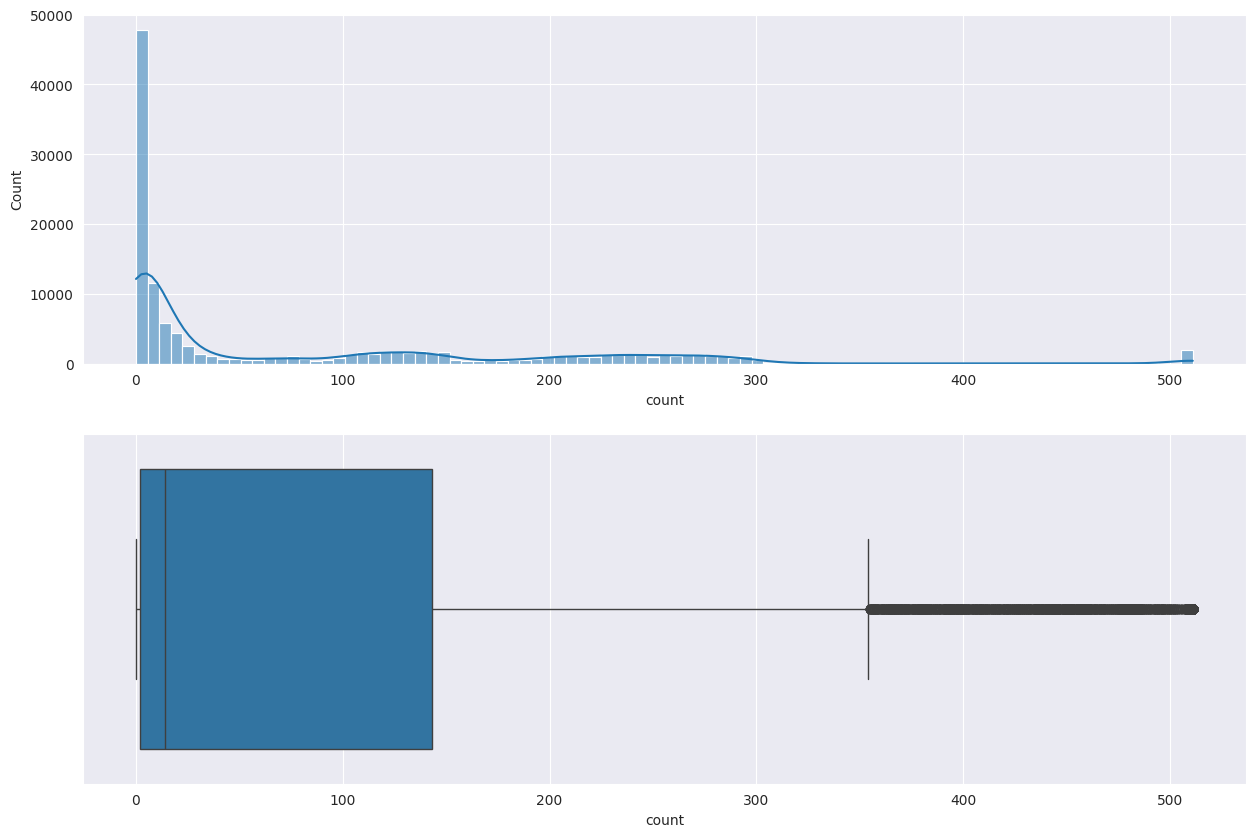

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['count'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['count'])

<Axes: xlabel='count', ylabel='Count'>

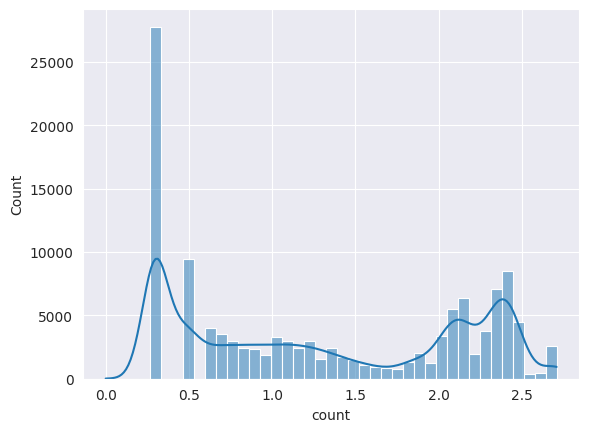

In [9]:
x1 = np.log10(df['count']+1)
sns.histplot(x1,kde=True)

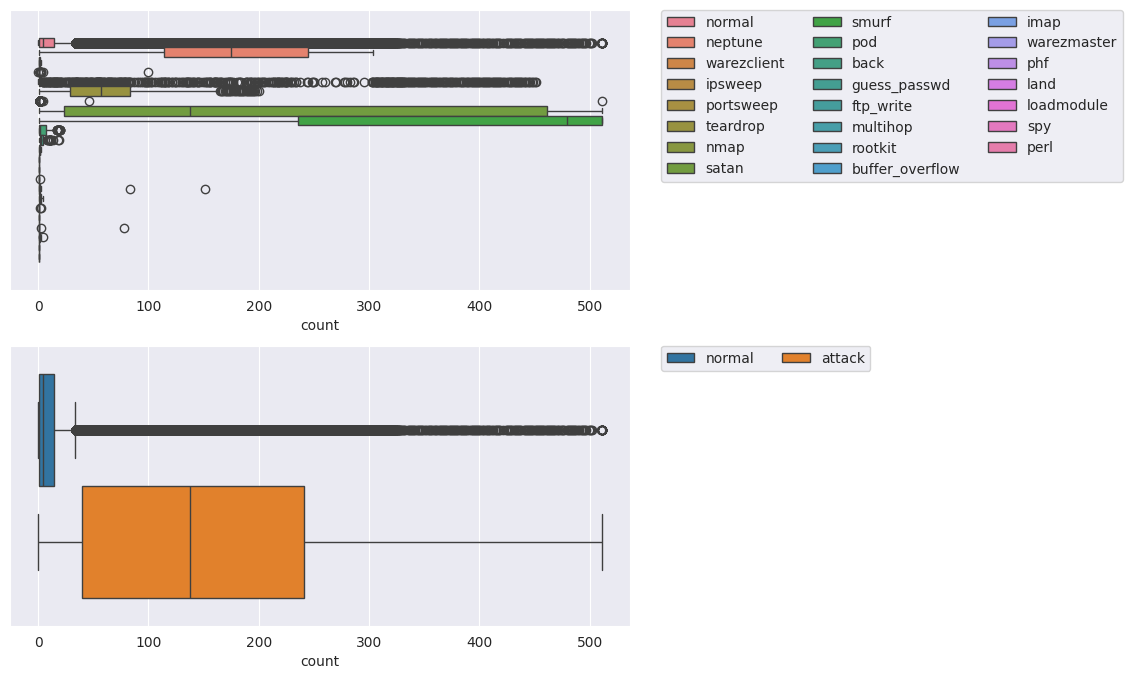

In [10]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='count',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='count',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [11]:
odf[odf['col'] == 'count']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
19,count,2.0,143.0,141.0,354.5,-209.5,122816,3157,97.493907,2.506093


In [12]:
pd.DataFrame(df['count'].describe()).T

,count,mean,std,min,25%,50%,75%,max
count,125973.0,84.107555,114.508607,0.0,2.0,14.0,143.0,511.0


In [13]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['count'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 1.0
20 percentile value is 1.0
30 percentile value is 3.0
40 percentile value is 7.0
50 percentile value is 14.0
60 percentile value is 47.0
70 percentile value is 122.0
80 percentile value is 195.0
90 percentile value is 256.0
100 percentile value is 511.0


In [14]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['count'].dropna(),i)))

90 percentile value is 256.0
91 percentile value is 262.0
92 percentile value is 268.0
93 percentile value is 273.0
94 percentile value is 279.0
95 percentile value is 286.0
96 percentile value is 293.0
97 percentile value is 301.0
98 percentile value is 445.0
99 percentile value is 511.0
100 percentile value is 511.0


<Axes: xlabel='srvcount'>

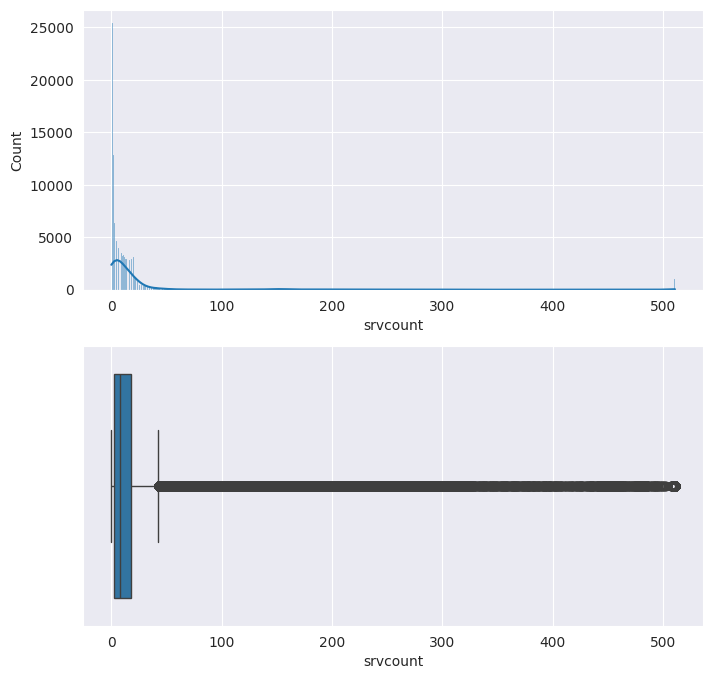

In [15]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.histplot(df['srvcount'].dropna(),kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['srvcount'].dropna())

<Axes: xlabel='srvcount', ylabel='Count'>

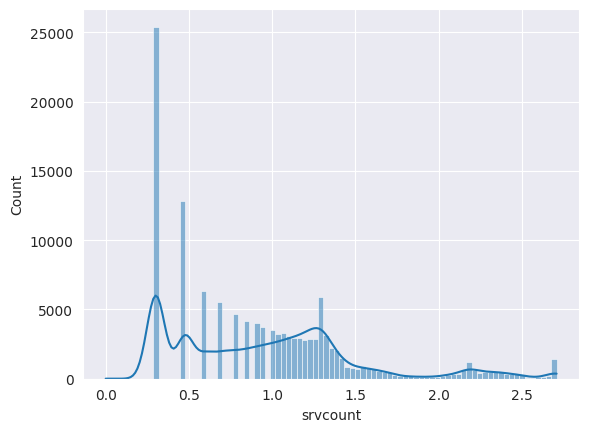

In [16]:
x1 = np.log10(df['srvcount']+1)
sns.histplot(x1,kde=True)

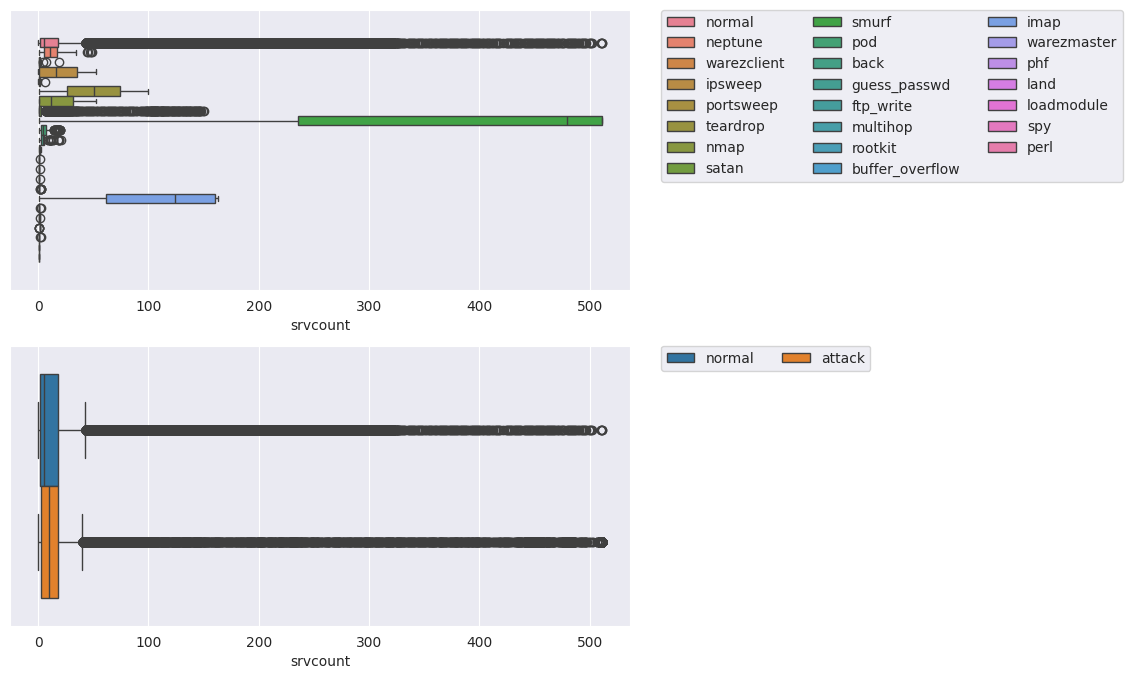

In [17]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='srvcount',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='srvcount',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [18]:
odf[odf['col'] == 'srvcount']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
20,srvcount,2.0,18.0,16.0,42.0,-22.0,113919,12054,90.431283,9.568717


In [19]:
pd.DataFrame(df['srvcount'].describe()).T

,count,mean,std,min,25%,50%,75%,max
srvcount,125973.0,27.737888,72.63584,0.0,2.0,8.0,18.0,511.0


In [20]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['srvcount'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 1.0
20 percentile value is 1.0
30 percentile value is 2.0
40 percentile value is 5.0
50 percentile value is 8.0
60 percentile value is 11.0
70 percentile value is 15.0
80 percentile value is 20.0
90 percentile value is 40.0
100 percentile value is 511.0


In [21]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['srvcount'].dropna(),i)))

90 percentile value is 40.0
91 percentile value is 47.0
92 percentile value is 65.0
93 percentile value is 114.0
94 percentile value is 146.0
95 percentile value is 158.0
96 percentile value is 189.0
97 percentile value is 227.0
98 percentile value is 286.0
99 percentile value is 492.0
100 percentile value is 511.0


In [22]:
df.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'land',
       'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin', 'numcompromised',
       'rootshell', 'suattempted', 'numroot', 'numfilecreations', 'numshells', 'numaccessfiles',
       'numoutboundcmds', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate',
       'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate',
       'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate',
       'attack', 'lastflag', 'is_attack'],
      dtype='object')

<Axes: xlabel='serrorrate'>

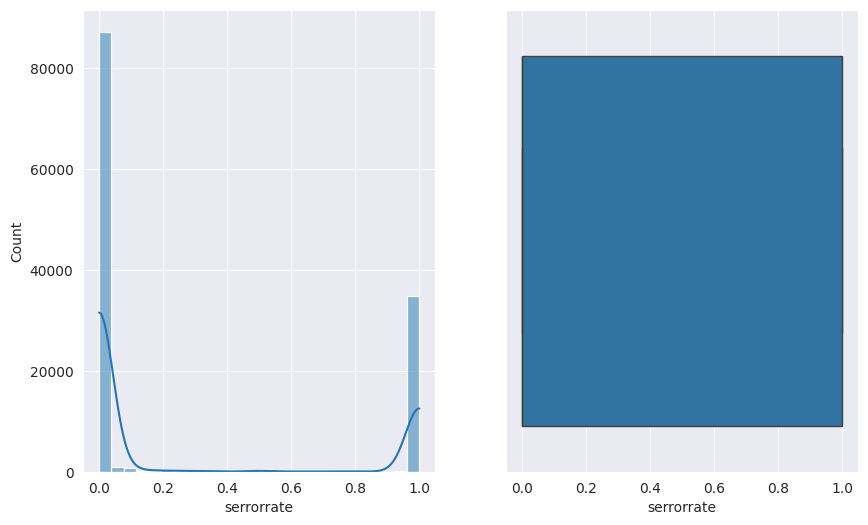

In [23]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['serrorrate'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(x=df['serrorrate'])

<Axes: xlabel='logserrorrate', ylabel='Count'>

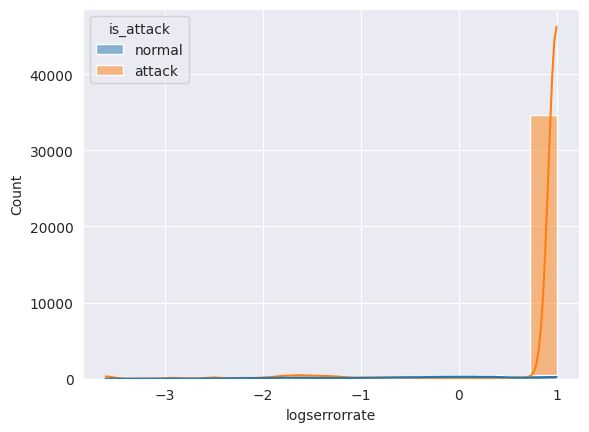

In [49]:
x1 = np.log10(df['serrorrate']+1)
#sns.histplot(x1,kde=True)
cdf['logserrorrate'] = np.log(cdf['serrorrate'])+1
sns.histplot(data=cdf,x='logserrorrate',kde=True,hue='is_attack')

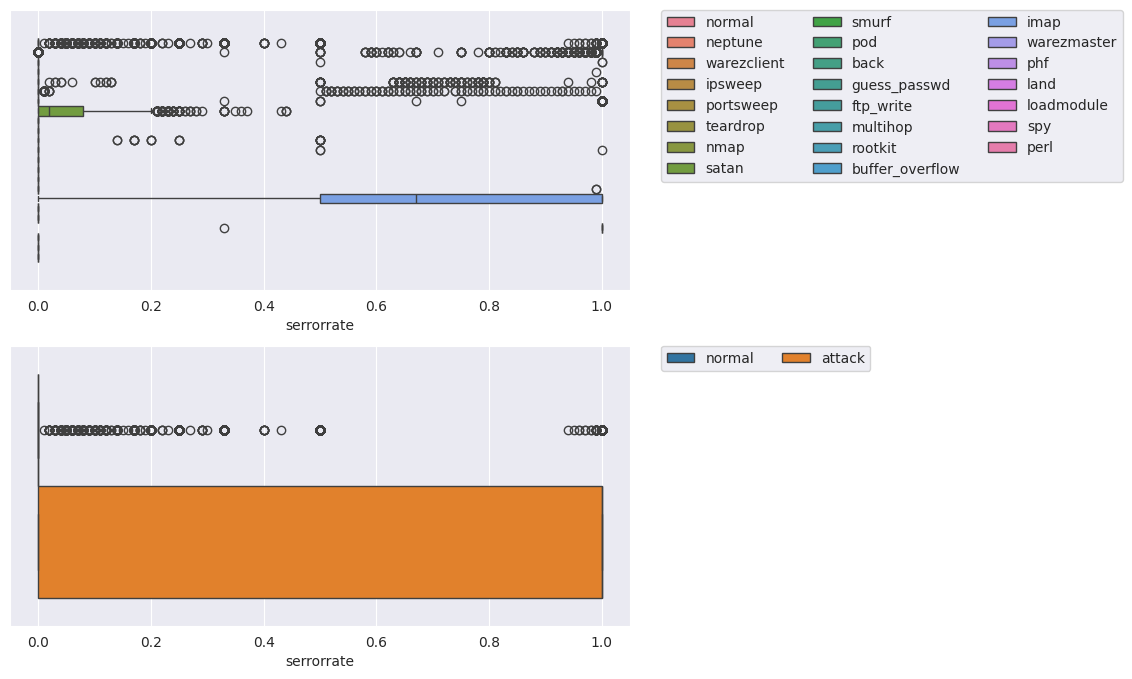

In [25]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='serrorrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='serrorrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [27]:
odf[odf['col'] == 'serrorrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
21,serrorrate,0.0,1.0,1.0,2.5,-1.5,125973,0,100.0,0.0


In [28]:
pd.DataFrame(df['serrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
serrorrate,125973.0,0.284485,0.446456,0.0,0.0,0.0,1.0,1.0


In [29]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['serrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.07
80 percentile value is 1.0
90 percentile value is 1.0
100 percentile value is 1.0


In [31]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['serrorrate'].dropna(),i)))

90 percentile value is 1.0
91 percentile value is 1.0
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 1.0


<Axes: xlabel='srvserrorrate'>

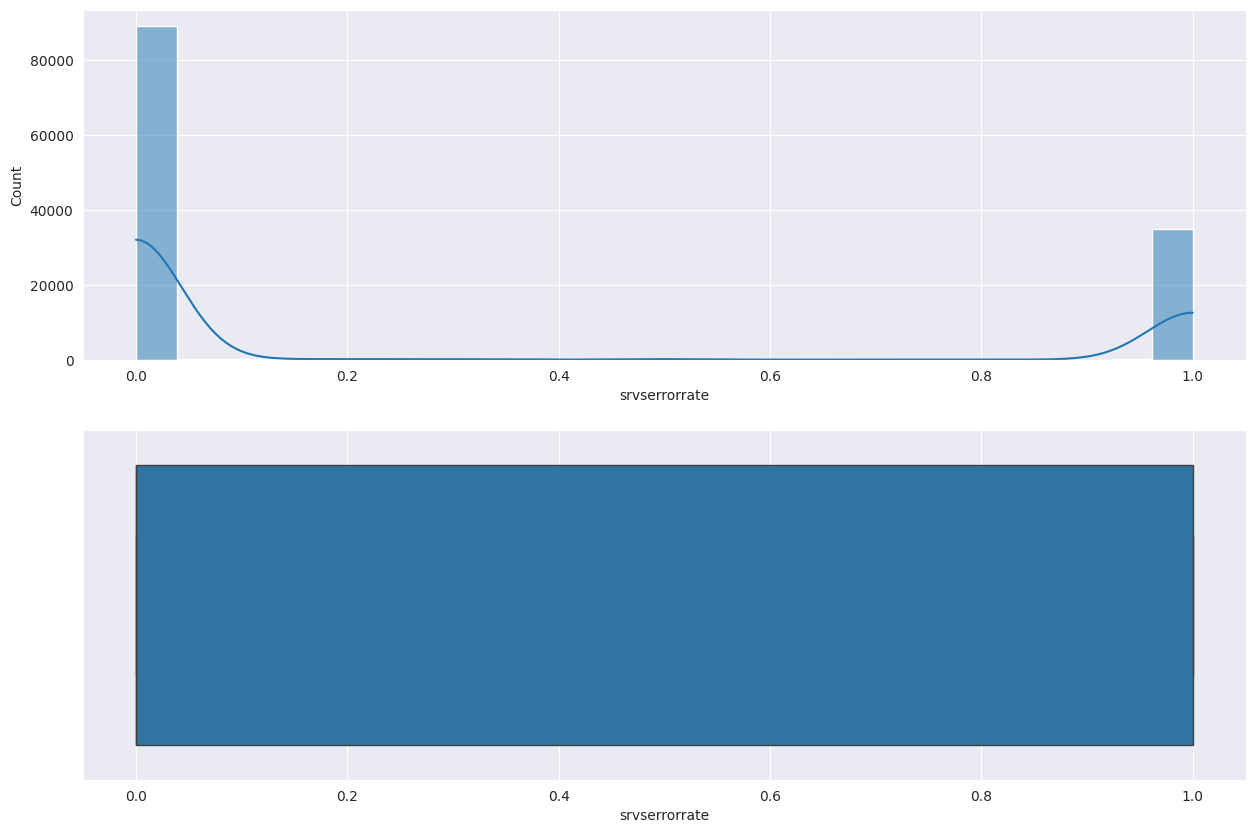

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['srvserrorrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['srvserrorrate'])

<Axes: xlabel='logsrvserrorrate', ylabel='Count'>

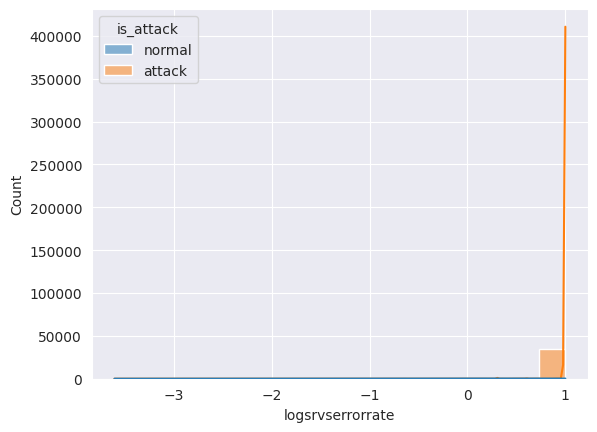

In [50]:
x1 = np.log10(df['srvserrorrate']+1)
cdf['logsrvserrorrate'] = np.log(cdf['srvserrorrate'])+1
sns.histplot(data=cdf,x='logsrvserrorrate',kde=True,hue='is_attack')

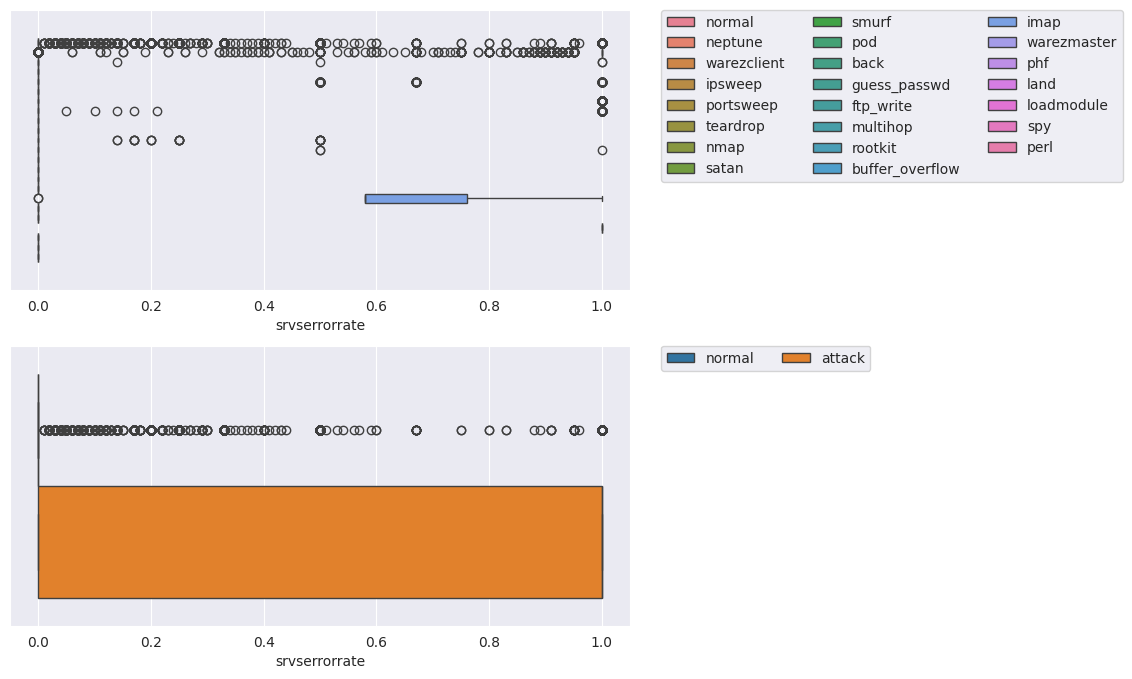

In [36]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='srvserrorrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='srvserrorrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [51]:
odf[odf['col'] == 'srvserrorrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
22,srvserrorrate,0.0,1.0,1.0,2.5,-1.5,125973,0,100.0,0.0


In [52]:
pd.DataFrame(df['srvserrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
srvserrorrate,125973.0,0.282485,0.447022,0.0,0.0,0.0,1.0,1.0


In [53]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['srvserrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 1.0
90 percentile value is 1.0
100 percentile value is 1.0


In [54]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['srvserrorrate'].dropna(),i)))

90 percentile value is 1.0
91 percentile value is 1.0
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 1.0


<Axes: xlabel='rerrorrate'>

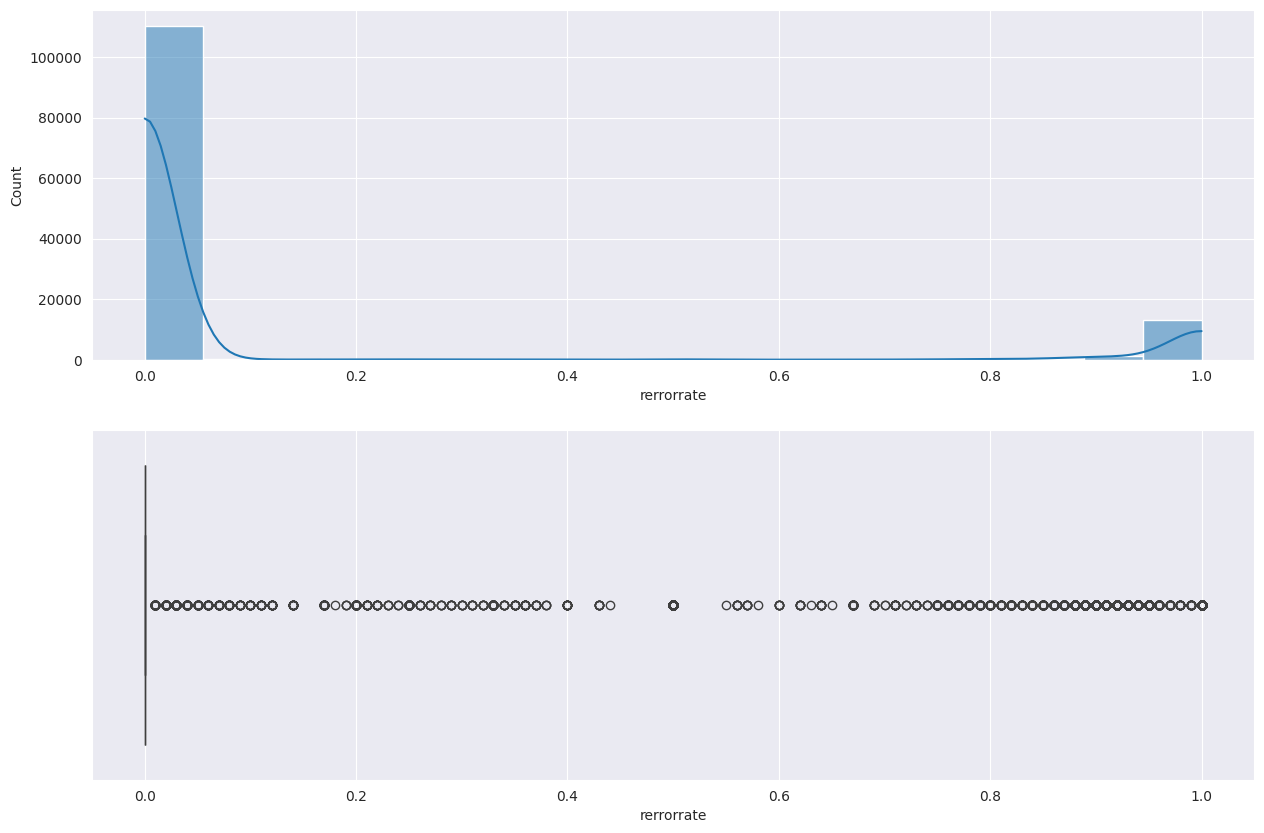

In [55]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['rerrorrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['rerrorrate'])

<Axes: xlabel='rerrorrate', ylabel='Count'>

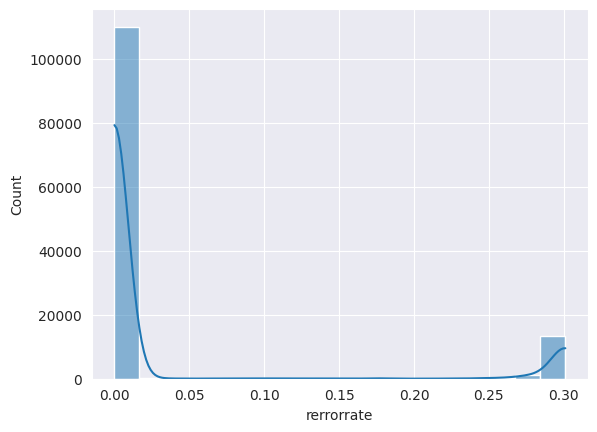

In [56]:
x1 = np.log10(df['rerrorrate']+1)
sns.histplot(x1,kde=True)

<Axes: xlabel='logrerrorrate', ylabel='Count'>

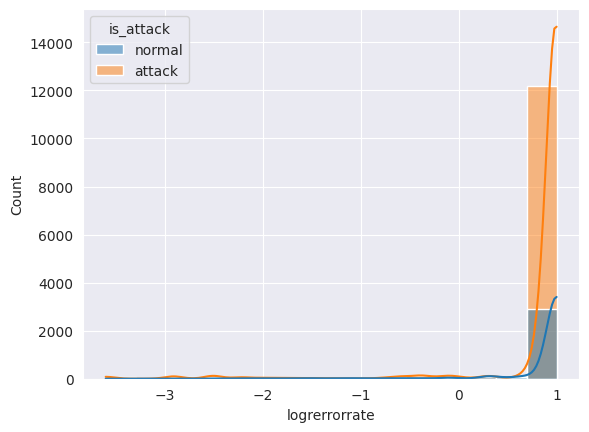

In [59]:
cdf['logrerrorrate'] = np.log(cdf['rerrorrate'])+1
sns.histplot(data=cdf,x='logrerrorrate',kde=True,hue='is_attack')

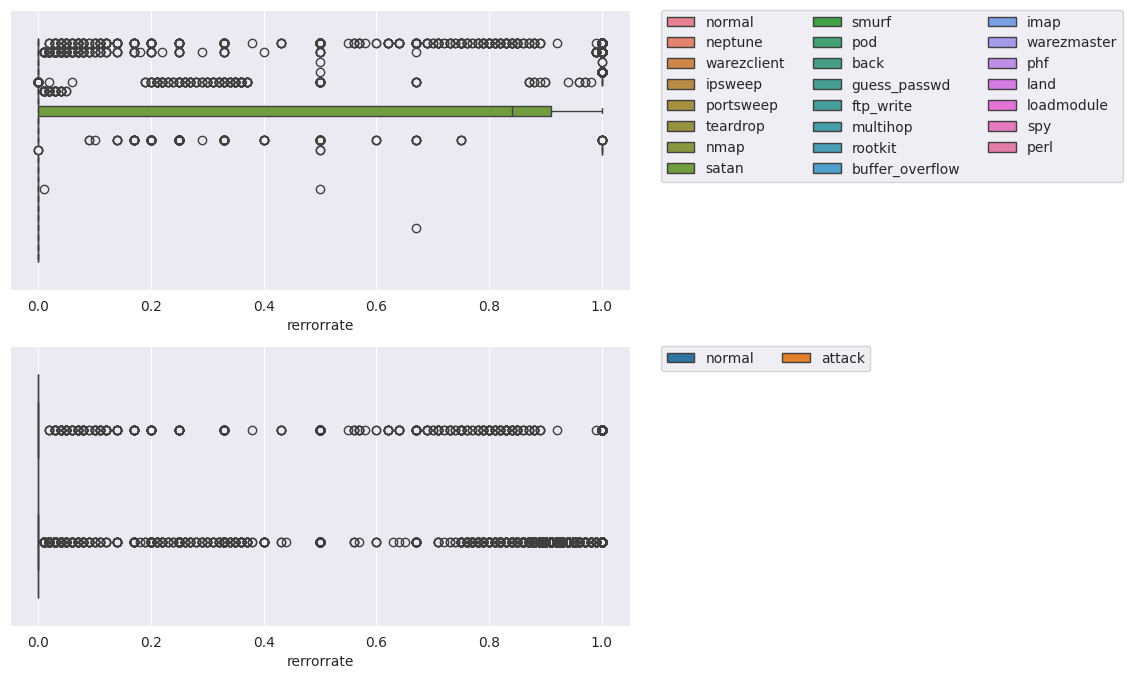

In [61]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='rerrorrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='rerrorrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [62]:
odf[odf['col'] == 'rerrorrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
23,rerrorrate,0.0,0.0,0.0,0.0,0.0,109783,16190,87.14804,12.85196


In [63]:
pd.DataFrame(df['rerrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
rerrorrate,125973.0,0.119958,0.320436,0.0,0.0,0.0,0.0,1.0


In [64]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['rerrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 1.0
100 percentile value is 1.0


In [65]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['rerrorrate'].dropna(),i)))

90 percentile value is 1.0
91 percentile value is 1.0
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 1.0


<Axes: xlabel='srvrerrorrate'>

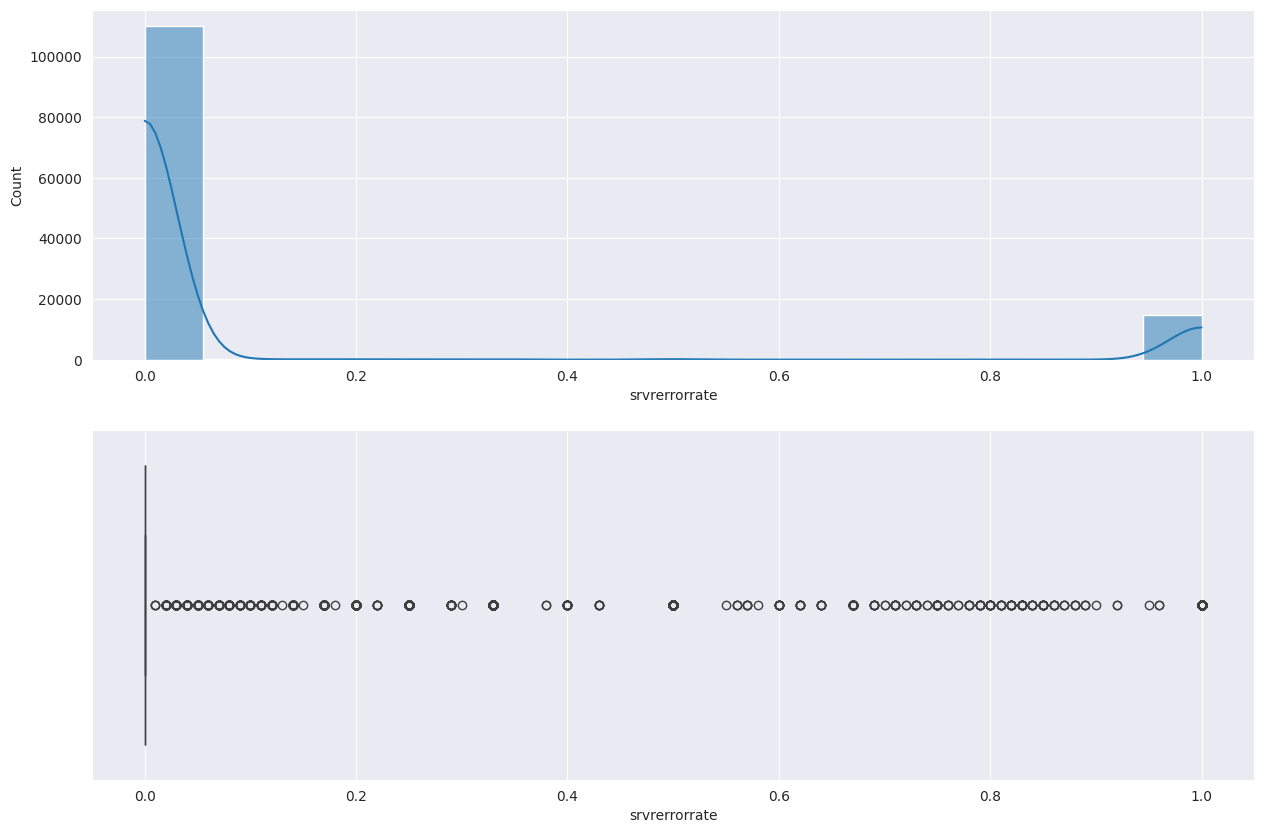

In [66]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['srvrerrorrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['srvrerrorrate'])

<Axes: xlabel='srvrerrorrate', ylabel='Count'>

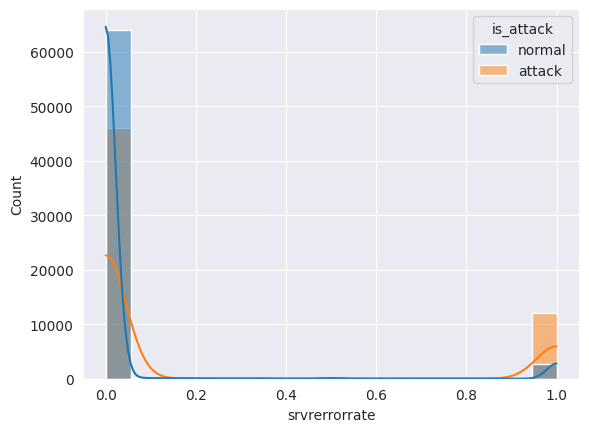

In [68]:
sns.histplot(data=cdf,x='srvrerrorrate',kde=True,hue='is_attack')

<Axes: xlabel='logsrvrerrorrate', ylabel='Count'>

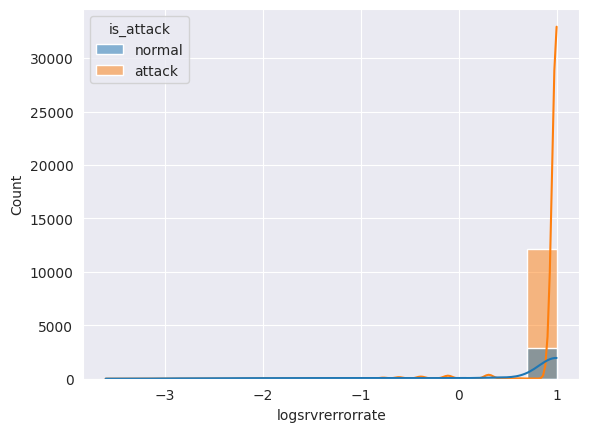

In [67]:
cdf['logsrvrerrorrate'] = np.log(cdf['srvrerrorrate'])+1
sns.histplot(data=cdf,x='logsrvrerrorrate',kde=True,hue='is_attack')

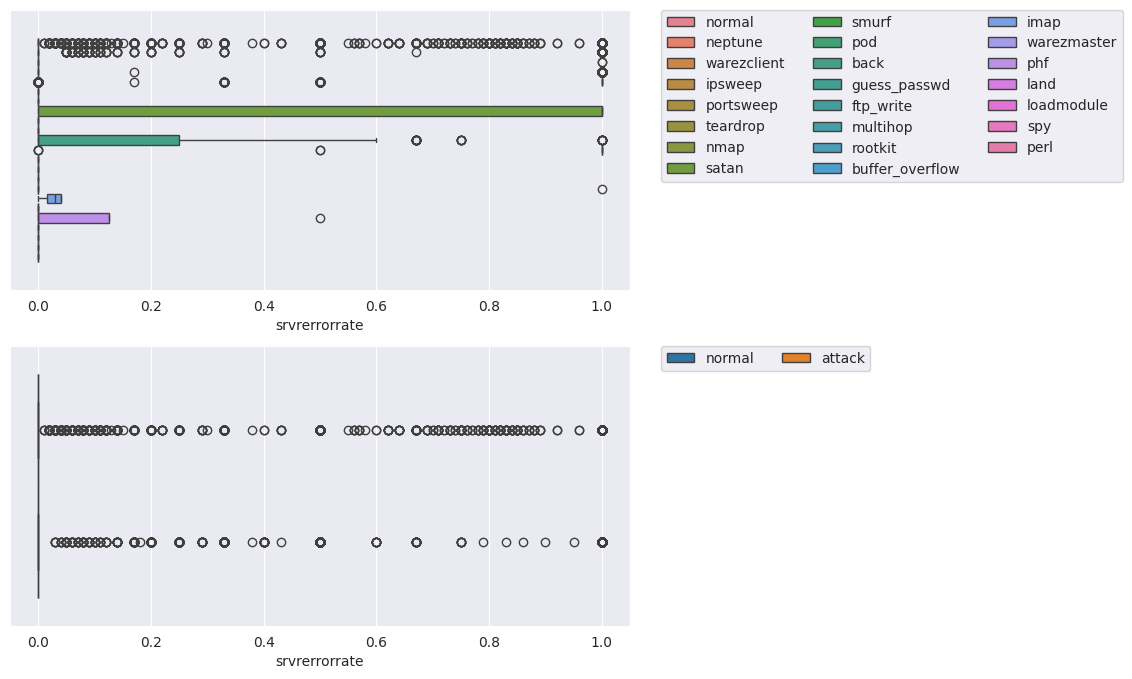

In [69]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='srvrerrorrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='srvrerrorrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [70]:
odf[odf['col'] == 'srvrerrorrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
24,srvrerrorrate,0.0,0.0,0.0,0.0,0.0,109767,16206,87.135339,12.864661


In [71]:
pd.DataFrame(df['srvrerrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
srvrerrorrate,125973.0,0.121183,0.323647,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='samesrvrate'>

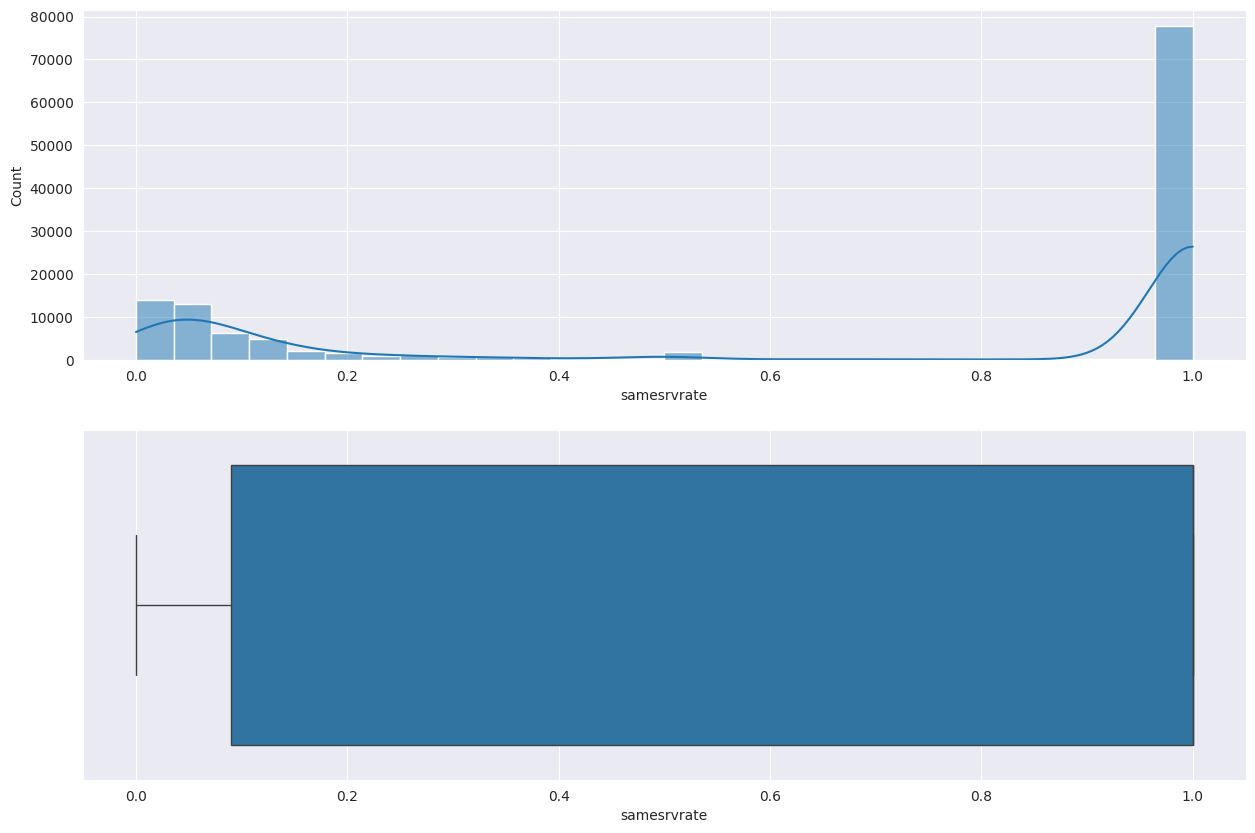

In [74]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['samesrvrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['samesrvrate'])

<Axes: xlabel='logsamesrvrate', ylabel='Count'>

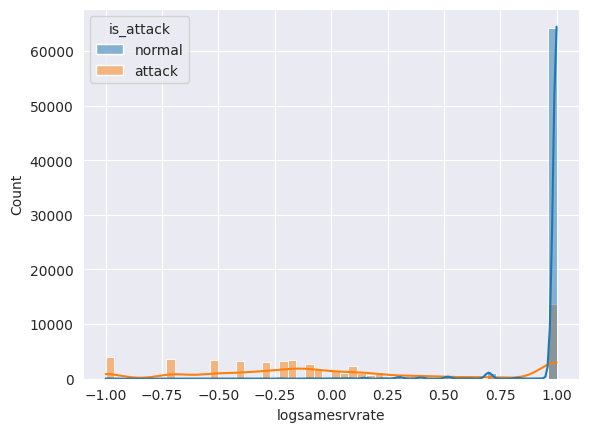

In [75]:
cdf['logsamesrvrate'] = np.log10(cdf['samesrvrate'])+1
sns.histplot(data=cdf,kde=True,x='logsamesrvrate',hue='is_attack')

<Axes: xlabel='samesrvrate', ylabel='Count'>

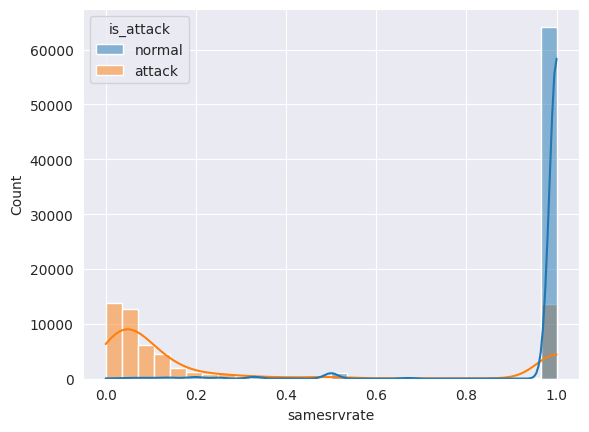

In [76]:
sns.histplot(data=cdf,kde=True,x='samesrvrate',hue='is_attack')

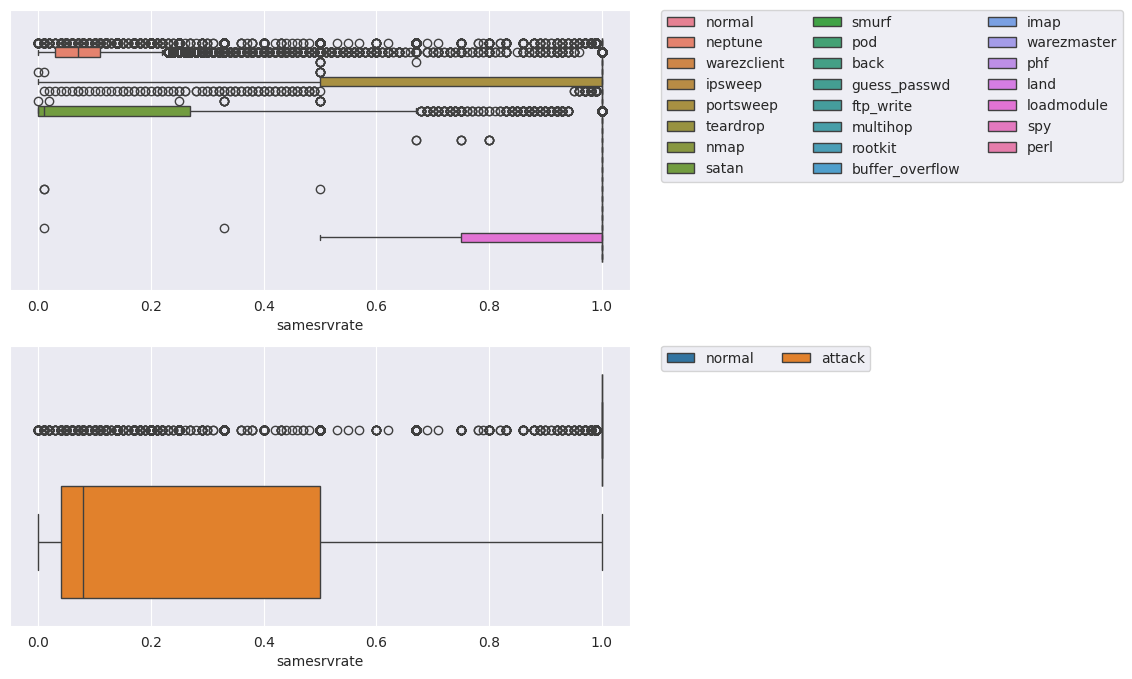

In [77]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='samesrvrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='samesrvrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [78]:
odf[odf['col'] == 'samesrvrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
25,samesrvrate,0.09,1.0,0.91,2.365,-1.275,125973,0,100.0,0.0


In [79]:
pd.DataFrame(df['samesrvrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
samesrvrate,125973.0,0.660928,0.439623,0.0,0.09,1.0,1.0,1.0


In [81]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['samesrvrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.03
20 percentile value is 0.07
30 percentile value is 0.14
40 percentile value is 1.0
50 percentile value is 1.0
60 percentile value is 1.0
70 percentile value is 1.0
80 percentile value is 1.0
90 percentile value is 1.0
100 percentile value is 1.0


In [80]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['samesrvrate'].dropna(),i)))

90 percentile value is 1.0
91 percentile value is 1.0
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 1.0


<Axes: xlabel='diffsrvrate'>

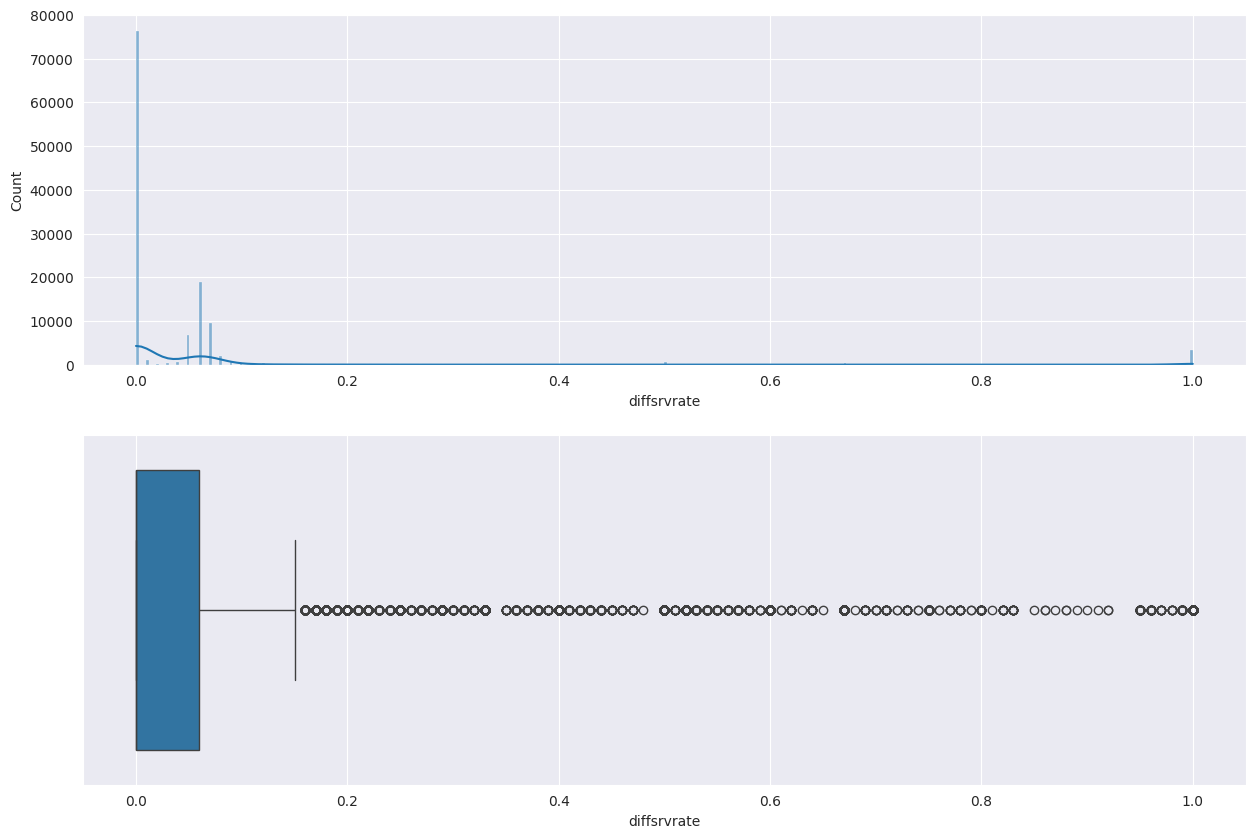

In [83]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['diffsrvrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['diffsrvrate'])

<Axes: xlabel='logdiffsrvrate', ylabel='Count'>

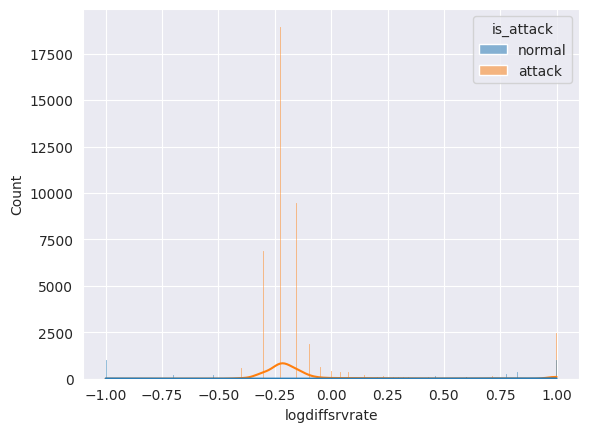

In [85]:
cdf['logdiffsrvrate'] = np.log10(cdf['diffsrvrate'])+1
sns.histplot(data=cdf,kde=True,x='logdiffsrvrate',hue='is_attack')

<Axes: xlabel='diffsrvrate', ylabel='Count'>

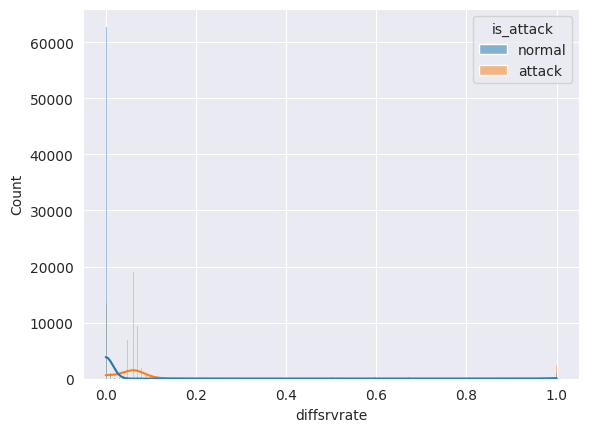

In [86]:
sns.histplot(data=cdf,kde=True,x='diffsrvrate',hue='is_attack')

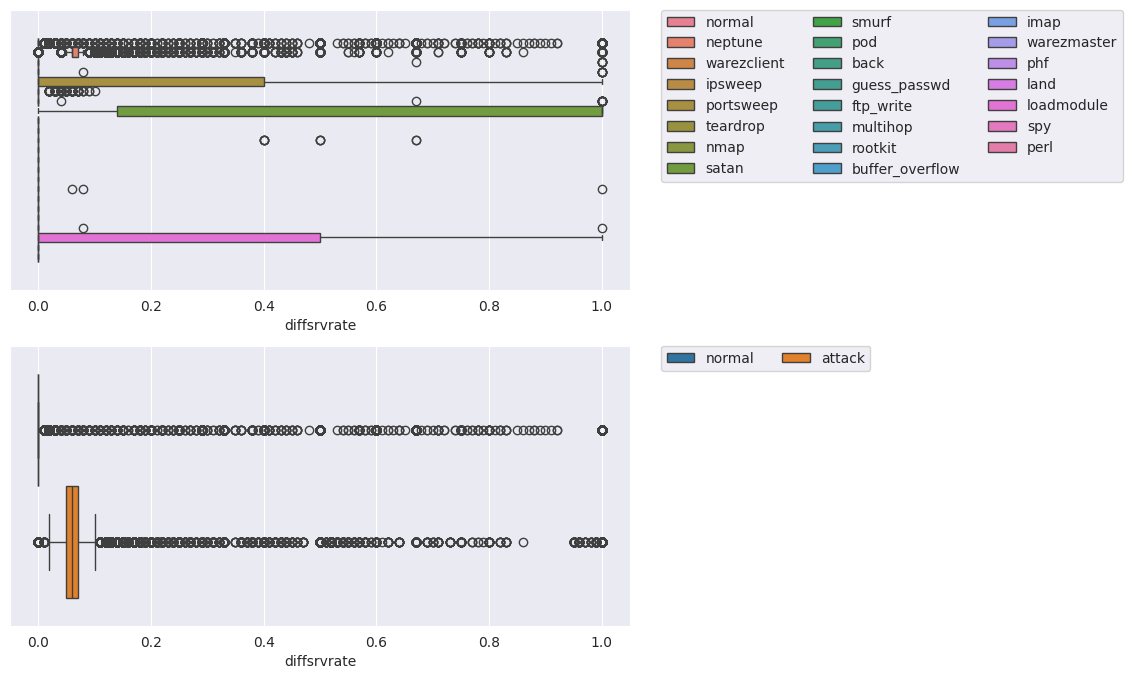

In [87]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='diffsrvrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='diffsrvrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [88]:
odf[odf['col'] == 'diffsrvrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
26,diffsrvrate,0.0,0.06,0.06,0.15,-0.09,118185,7788,93.817723,6.182277


In [89]:
pd.DataFrame(df['diffsrvrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
diffsrvrate,125973.0,0.063053,0.180314,0.0,0.0,0.0,0.06,1.0


In [90]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['diffsrvrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.06
80 percentile value is 0.06
90 percentile value is 0.07
100 percentile value is 1.0


In [91]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['diffsrvrate'].dropna(),i)))

90 percentile value is 0.07
91 percentile value is 0.08
92 percentile value is 0.09
93 percentile value is 0.11
94 percentile value is 0.17
95 percentile value is 0.29
96 percentile value is 0.5
97 percentile value is 0.67
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 1.0


<Axes: xlabel='srvdiffhostrate'>

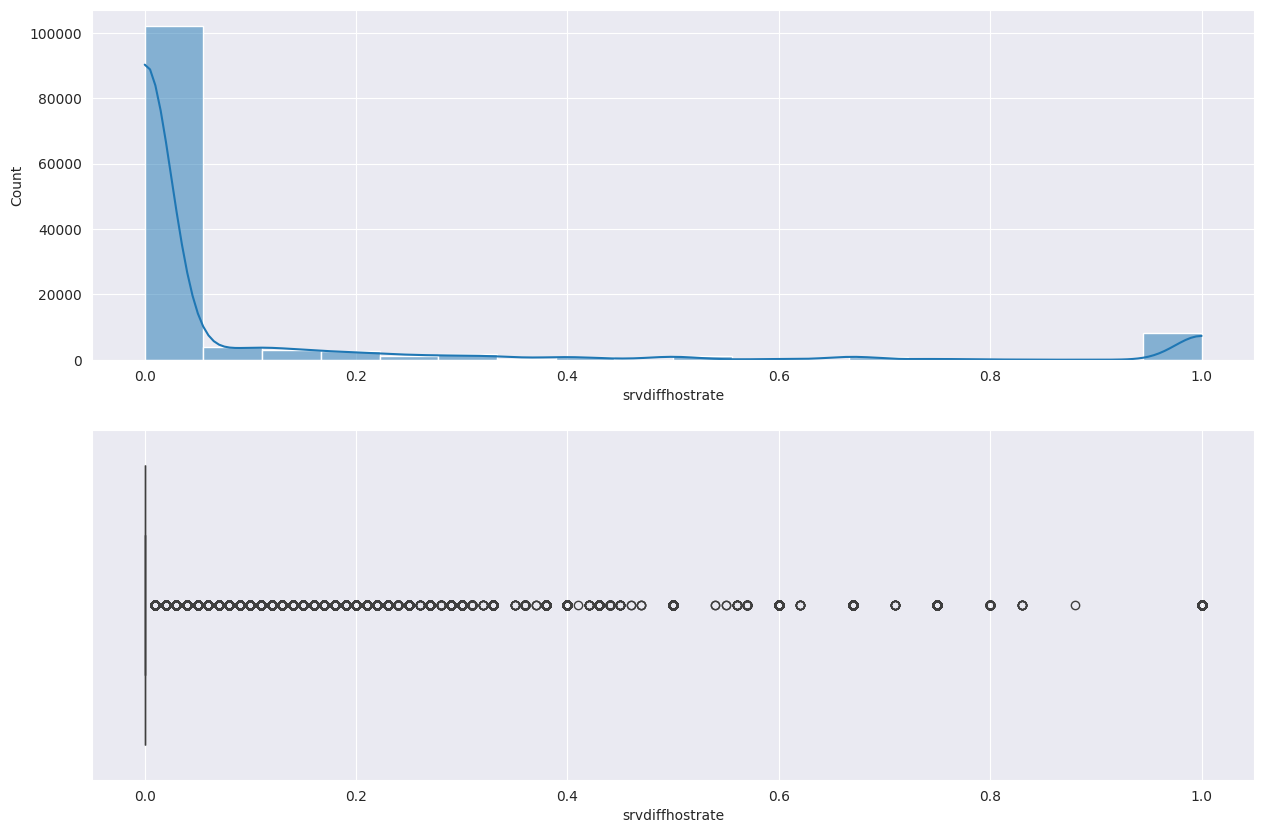

In [93]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['srvdiffhostrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['srvdiffhostrate'])

<Axes: xlabel='logsrvdiffhostrate', ylabel='Count'>

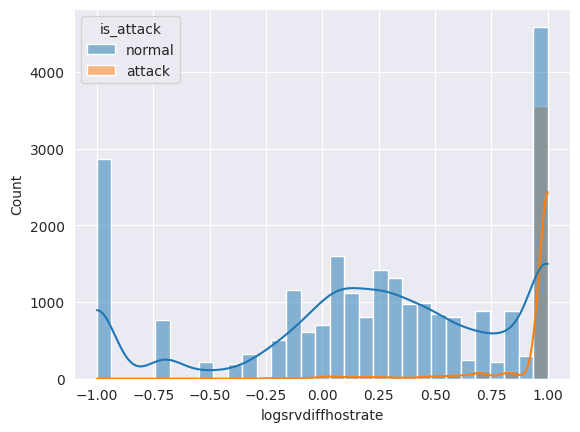

In [94]:
cdf['logsrvdiffhostrate'] = np.log10(cdf['srvdiffhostrate'])+1
sns.histplot(data=cdf,kde=True,x='logsrvdiffhostrate',hue='is_attack')

<Axes: xlabel='srvdiffhostrate', ylabel='Count'>

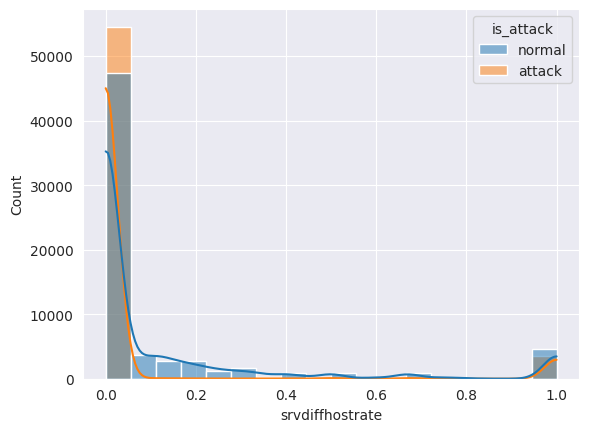

In [95]:
sns.histplot(data=cdf,kde=True,x='srvdiffhostrate',hue='is_attack')

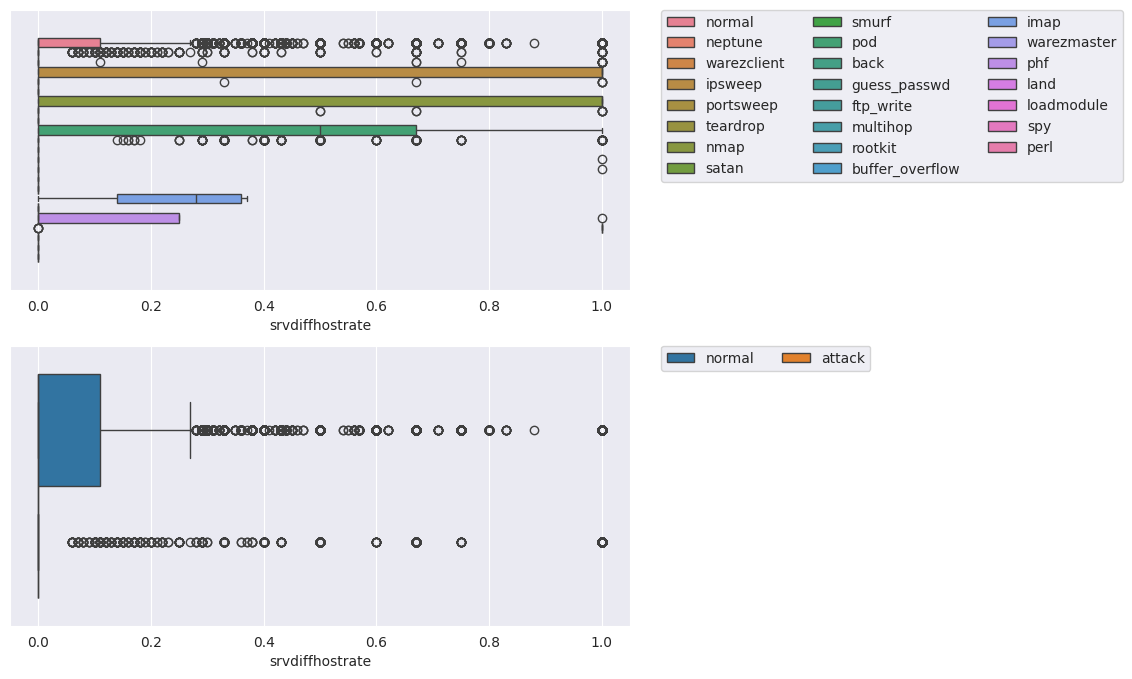

In [96]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='srvdiffhostrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='srvdiffhostrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [97]:
odf[odf['col'] == 'srvdiffhostrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
27,srvdiffhostrate,0.0,0.0,0.0,0.0,0.0,97574,28399,77.45628,22.54372


In [98]:
pd.DataFrame(df['srvdiffhostrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
srvdiffhostrate,125973.0,0.097322,0.25983,0.0,0.0,0.0,0.0,1.0


In [99]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['srvdiffhostrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.02
90 percentile value is 0.31
100 percentile value is 1.0


In [100]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['srvdiffhostrate'].dropna(),i)))

90 percentile value is 0.31
91 percentile value is 0.4
92 percentile value is 0.5
93 percentile value is 0.67
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 1.0
